In [19]:
#Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [2]:
data = pd.read_csv("/content/fake_or_real_news.csv")
data_copy = data.copy()

data.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
data.shape

(6335, 4)

In [4]:
data.isnull().sum()

,0
id,0
title,0
text,0
label,0


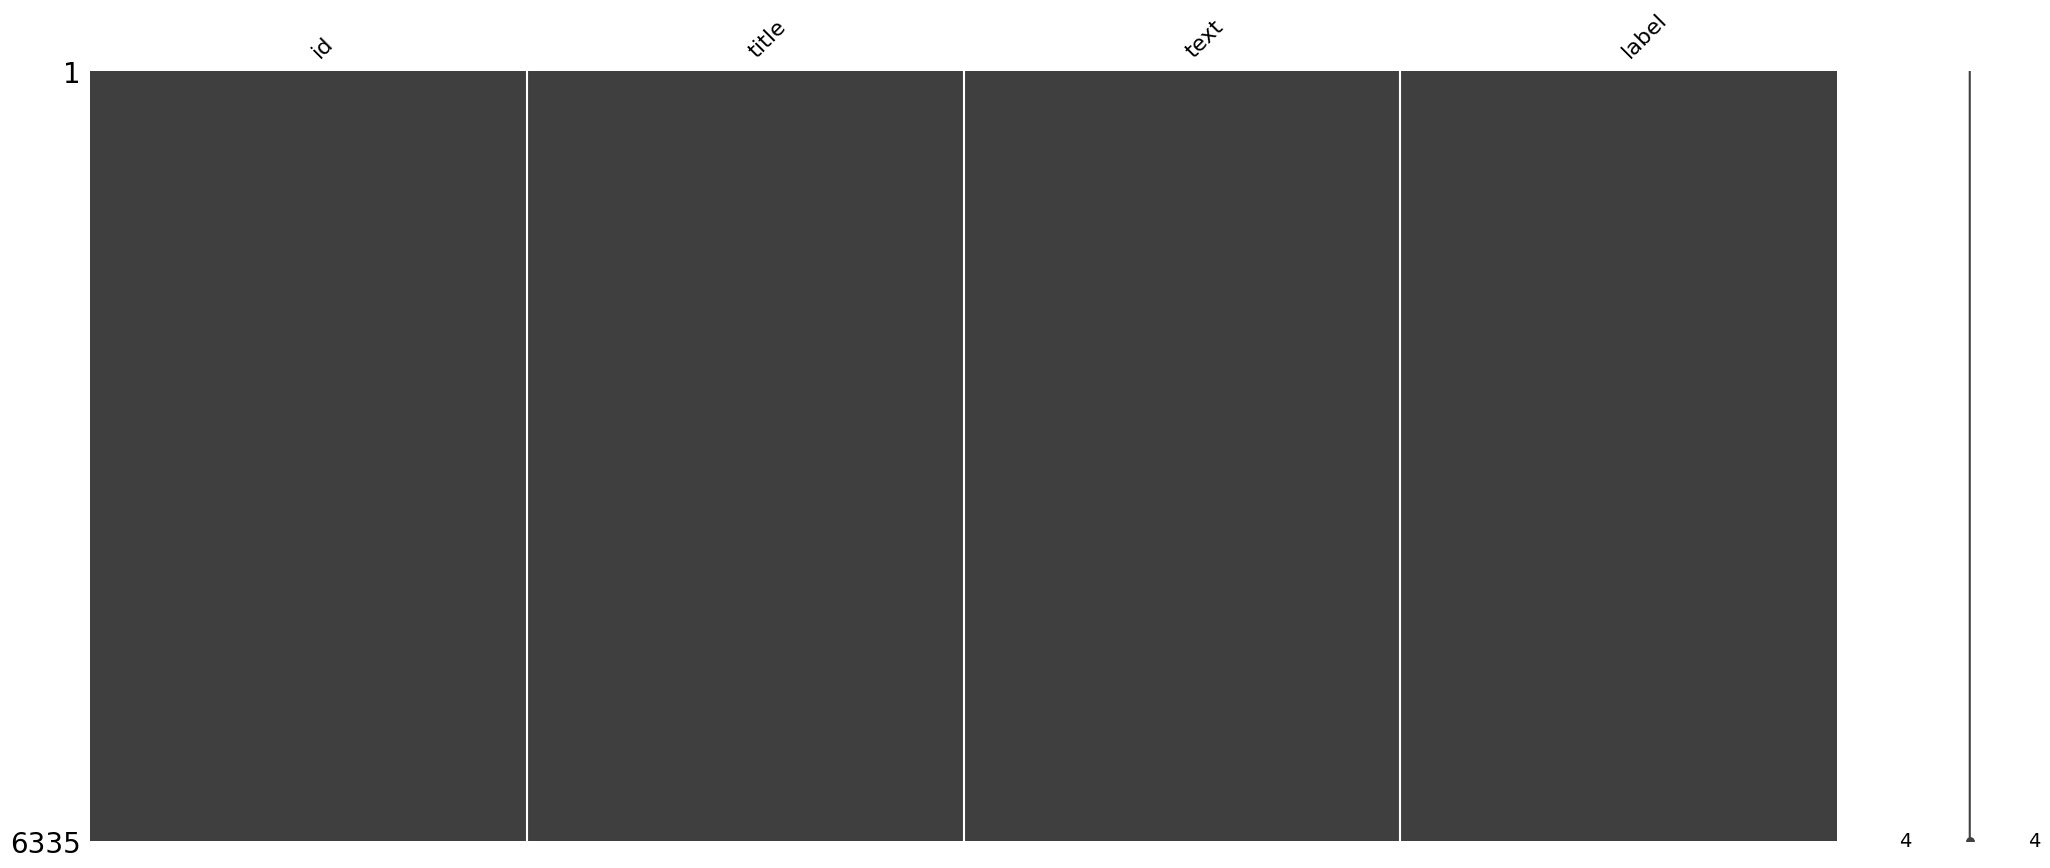

In [6]:
ms.matrix(data)
plt.show()

In [7]:
data['Fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)

data.tail()

,id,title,text,label,Fake
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,0
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL,0


In [8]:
data.drop(columns = 'label', axis = 1, inplace = True)
data.columns

Index(['id', 'title', 'text', 'Fake'], dtype='object')

In [9]:
x, y = data['text'], data['Fake']

In [10]:
#spliting data

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [11]:
vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.8)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [12]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [14]:
pred = model.predict(x_test)

Accuracy: 92.82 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       652
           1       0.93      0.93      0.93       615

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



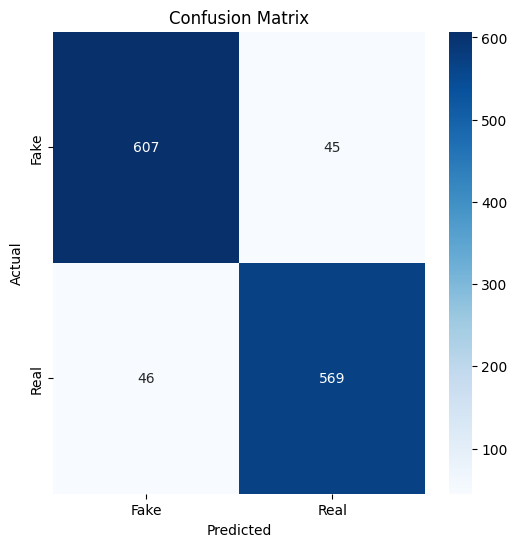

In [18]:
acs = accuracy_score(y_test, pred)
print(f'Accuracy: {round((acs * 100), 2)} %')

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, pred))


# Confusion Matrix visualization
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
params = {
    'C': [0.01, 0.1, 1],
    'max_iter': [100, 1000, 2000],
    'tol': [1e-3, 1e-4]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'tol': 0.001}


Accuracy: 92.82 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       652
           1       0.93      0.93      0.93       615

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



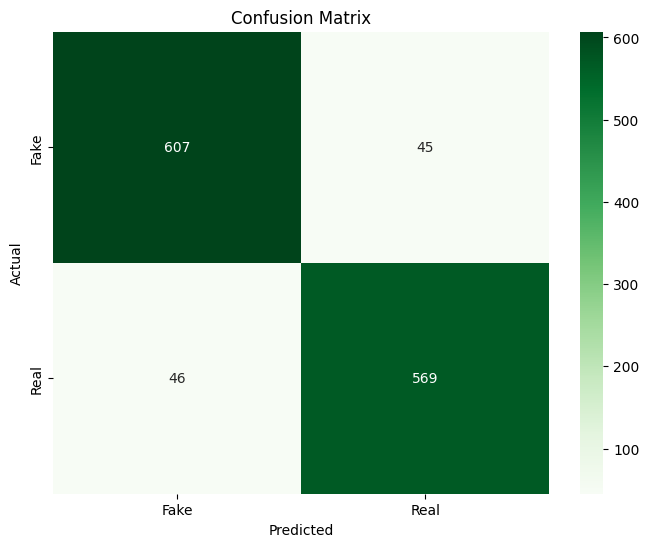

In [23]:
#After tuning

model = LinearSVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)

acs = accuracy_score(y_test, pred)
print(f'Accuracy: {round((acs * 100), 2)} %')

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, pred))


# Confusion Matrix visualization
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()